# Autoencoder Artificial Neural Network

In [1]:
# ===== # IMPORTS # ===== #
import os
import sys

from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nb_dir = os.path.split(os.getcwd())[0]
models_dir = os.path.abspath(os.path.join(nb_dir, 'models'))
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
if models_dir not in sys.path:
    sys.path.append(models_dir)

## Keras Implementation

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from models.autoencoder_keras import Autoencoder

Using TensorFlow backend.


In [3]:
# ===== # IMPORT DATA # ===== #
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('Train dataset shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test dataset shape: ', x_test.shape)

# ===== # PREPROCESS # ===== #
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('Train dataset reshaped: ', x_train.shape)
print('Test dataset reshaped: ', x_test.shape)

Train dataset shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test dataset shape:  (10000, 28, 28)
Train dataset reshaped:  (60000, 784)
Test dataset reshaped:  (10000, 784)


In [ ]:
# ===== # KERAS IMPLEMENTATION # ===== #
autoencoder = Autoencoder(x_train.shape[1], 32)
autoencoder.train(x_train, x_test, 256)
encoded_imgs = autoencoder.get_encoded_image(x_test)
decoded_imgs = autoencoder.get_decoded_image(encoded_imgs)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/250
60000/60000 [==============================] - 2s 30us/step - loss: 0.5269 - val_loss: 0.4536
Epoch 2/250
60000/60000 [==============================] - 1s 9us/step - loss: 0.4232 - val_loss: 0.4050
Epoch 3/250
60000/60000 [==============================] - 1s 12us/step - loss: 0.3938 - val_loss: 0.3854
Epoch 4/250
60000/60000 [==============================] - 2s 31us/step - loss: 0.3752 - val_loss: 0.3686
Epoch 5/250
60000/60000 [==============================] - 2s 35us/step - loss: 0.3604 - val_loss: 0.3560
Epoch 6/250
60000/60000 [==============================] - 1s 14us/step - loss: 0.3494 - val_loss: 0.3466
Epoch 7/250
60000/60000 [==============================] - 1s 15us/step - loss: 0.3411 - val_loss: 0.3394
Epoch 8/250
60000/60000 [==============================] - 2s 25us/step - loss: 0.3348 - 

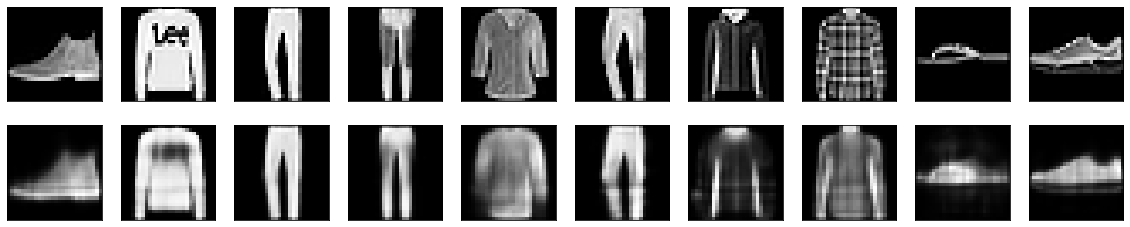

In [6]:
# ===== # KERAS EVALUATION # ===== #
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    subplot = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

    # Reconstruction
    subplot = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
plt.show()

## Tensorflow Implementation

In [ ]:
# %run ../models/autoencoder.py
from models.autoencoder import Autoencoder

In [ ]:
# ===== # CONFIGURATIONS # ===== #
hidden_dim = 1
data = datasets.load_iris().data
input_dim = len(data[0])
# input dim is (,4), hidden_dim is 1

ae = Autoencoder(input_dim=input_dim, hidden_dim=1)

In [ ]:
# ===== # TRAINING # ===== #
ae.train(data)

In [ ]:
# ===== # TESTING # ===== #
ae.test([[8, 4, 6, 2]])